In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
df = pd.read_csv("../data/madrid/concat_clim.csv")
df_estaciones = pd.read_csv("../data/madrid/Estaciones_control_datos_meteorologicos.csv")

In [5]:
df_estaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CÓDIGO               26 non-null     int64  
 1   CÓDIGO_CORTO         26 non-null     int64  
 2   ESTACIÓN             26 non-null     object 
 3   DIRECCION            26 non-null     object 
 4   LONGITUD_ETRS89      26 non-null     object 
 5   LATITUD_ETRS89       26 non-null     object 
 6   ALTITUD              26 non-null     int64  
 7   VV (81)              10 non-null     object 
 8   DV (82)              10 non-null     object 
 9   T (83)               25 non-null     object 
 10  HR (86)              23 non-null     object 
 11  PB (87)              8 non-null      object 
 12  RS (88)              8 non-null      object 
 13  P (89)               10 non-null     object 
 14  COD_VIA              25 non-null     float64
 15  VIA_CLASE            26 non-null     objec

In [6]:
df_estaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CÓDIGO               26 non-null     int64  
 1   CÓDIGO_CORTO         26 non-null     int64  
 2   ESTACIÓN             26 non-null     object 
 3   DIRECCION            26 non-null     object 
 4   LONGITUD_ETRS89      26 non-null     object 
 5   LATITUD_ETRS89       26 non-null     object 
 6   ALTITUD              26 non-null     int64  
 7   VV (81)              10 non-null     object 
 8   DV (82)              10 non-null     object 
 9   T (83)               25 non-null     object 
 10  HR (86)              23 non-null     object 
 11  PB (87)              8 non-null      object 
 12  RS (88)              8 non-null      object 
 13  P (89)               10 non-null     object 
 14  COD_VIA              25 non-null     float64
 15  VIA_CLASE            26 non-null     objec

In [7]:
df

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,102,VELOCIDAD VIENTO,28079102_81_98,2019,1,1,0.65,V,...,0.43,V,0.58,V,0.38,V,0.67,V,0.18,V
1,28,79,102,VELOCIDAD VIENTO,28079102_81_98,2019,1,2,0.50,V,...,0.53,V,1.13,V,2.02,V,3.48,V,2.82,V
2,28,79,102,VELOCIDAD VIENTO,28079102_81_98,2019,1,3,2.22,V,...,0.50,V,2.02,V,1.33,V,0.83,V,0.67,V
3,28,79,102,VELOCIDAD VIENTO,28079102_81_98,2019,1,4,0.87,V,...,0.13,V,0.58,V,0.92,V,0.20,V,0.33,V
4,28,79,102,VELOCIDAD VIENTO,28079102_81_98,2019,1,5,0.57,V,...,0.47,V,0.32,V,0.30,V,0.23,V,0.45,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124498,28,79,59,PRECIPITACIÓN,28079059_89_98,2022,12,27,0.00,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V
124499,28,79,59,PRECIPITACIÓN,28079059_89_98,2022,12,28,0.00,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V
124500,28,79,59,PRECIPITACIÓN,28079059_89_98,2022,12,29,0.00,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V
124501,28,79,59,PRECIPITACIÓN,28079059_89_98,2022,12,30,0.00,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V


In [8]:
df.drop(["PUNTO_MUESTREO","PROVINCIA","MUNICIPIO","V01","V02","V03","V04","V05","V06","V07","V08","V09","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24"],axis=1,inplace=True)

In [9]:
df["ESTACION"]

0         102
1         102
2         102
3         102
4         102
         ... 
124498     59
124499     59
124500     59
124501     59
124502     59
Name: ESTACION, Length: 124503, dtype: int64

In [10]:
dict_est = {4:"Plaza España",8:"Escuelas Aguirre",16:"Arturo Soria",18:"Farolillo",24:"Casa de Campo",35:"Plaza del Carmen",36:"Moratalaz",38:"Cuatro Caminos",39:"Barrio del Pilar",54:"Ensanche de Vallecas",56:"Plaza Elíptica",58:"El Pardo",59:"Juan Carlos I",102:"J.M.D. Moratalaz",103:"J.M.D. Villaverde",104:"E.D.A.R. La China",106:"Centro Mpal. De Acústica",107:"J.M.D. Hortaleza",108:"Peñagrande",109:"J.M.D.Chamberí",110:"J.M.D.Centro",111:"J.M.D.Chamartin",112:"J.M.D.Vallecas 1",113:"J.M.D.Vallecas 2",114:"Matadero 01",115:"Matadero 02"}

In [11]:
df['ESTACION'] = df['ESTACION'].map(dict_est)

In [12]:
df

,ESTACION,MAGNITUD,ANO,MES,DIA,H01,H02,H03,H04,H05,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
0,J.M.D. Moratalaz,VELOCIDAD VIENTO,2019,1,1,0.65,0.95,0.87,0.73,0.57,...,0.77,0.35,0.98,0.47,0.37,0.43,0.58,0.38,0.67,0.18
1,J.M.D. Moratalaz,VELOCIDAD VIENTO,2019,1,2,0.50,0.95,0.60,0.73,1.62,...,0.52,0.50,0.57,0.80,0.88,0.53,1.13,2.02,3.48,2.82
2,J.M.D. Moratalaz,VELOCIDAD VIENTO,2019,1,3,2.22,2.53,2.20,2.43,1.90,...,0.82,1.12,0.77,0.43,0.25,0.50,2.02,1.33,0.83,0.67
3,J.M.D. Moratalaz,VELOCIDAD VIENTO,2019,1,4,0.87,0.77,0.87,0.92,0.65,...,0.48,0.28,0.68,0.47,0.40,0.13,0.58,0.92,0.20,0.33
4,J.M.D. Moratalaz,VELOCIDAD VIENTO,2019,1,5,0.57,1.82,1.65,0.55,0.58,...,0.68,0.87,0.60,0.45,0.60,0.47,0.32,0.30,0.23,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124498,Juan Carlos I,PRECIPITACIÓN,2022,12,27,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
124499,Juan Carlos I,PRECIPITACIÓN,2022,12,28,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
124500,Juan Carlos I,PRECIPITACIÓN,2022,12,29,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
124501,Juan Carlos I,PRECIPITACIÓN,2022,12,30,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [13]:
df["MAGNITUD"].unique()

array(['VELOCIDAD VIENTO', 'DIR. DE VIENTO', 'TEMPERATURA',
       'HUMEDAD RELATIVA', 'PRESION BARIOMETRICA', 'RADIACION SOLAR',
       'PRECIPITACIÓN', '80'], dtype=object)

Solo dejamos de magnitud temperatura para analizar los proceso por los que pasa la temperatura. 

In [14]:
df_temperatura = df.loc[df['MAGNITUD'] == 'TEMPERATURA']

In [15]:
df_temperatura

,ESTACION,MAGNITUD,ANO,MES,DIA,H01,H02,H03,H04,H05,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
62,J.M.D. Moratalaz,TEMPERATURA,2019,1,1,3.1,2.9,3.1,1.9,0.7,...,10.4,11.9,10.1,8.5,7.7,7.1,6.6,5.8,4.1,3.4
63,J.M.D. Moratalaz,TEMPERATURA,2019,1,2,2.3,1.8,0.9,-0.2,-1.1,...,10.6,11.7,11.5,9.9,8.7,8.2,7.4,5.4,4.6,3.9
64,J.M.D. Moratalaz,TEMPERATURA,2019,1,3,3.0,2.8,2.0,2.0,1.6,...,9.9,9.7,9.7,8.6,8.1,7.4,6.0,4.6,3.9,3.4
65,J.M.D. Moratalaz,TEMPERATURA,2019,1,4,2.1,1.5,1.0,0.7,0.1,...,10.9,11.7,10.5,8.8,6.9,6.2,5.7,4.7,4.1,3.4
66,J.M.D. Moratalaz,TEMPERATURA,2019,1,5,1.8,0.1,-0.6,-0.4,-0.3,...,9.5,10.6,10.7,9.1,7.1,6.3,5.7,4.1,4.2,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124374,Juan Carlos I,TEMPERATURA,2022,12,27,7.2,6.5,6.0,5.5,5.0,...,14.2,14.9,15.0,13.7,11.0,10.1,10.0,8.5,7.5,6.6
124375,Juan Carlos I,TEMPERATURA,2022,12,28,5.7,5.6,5.1,4.7,4.3,...,13.4,13.2,13.5,12.5,11.8,11.1,10.8,10.3,10.3,10.5
124376,Juan Carlos I,TEMPERATURA,2022,12,29,10.1,9.5,9.1,8.5,8.5,...,11.4,11.4,11.3,11.5,11.2,11.0,10.9,10.4,11.0,11.1
124377,Juan Carlos I,TEMPERATURA,2022,12,30,11.2,11.3,11.0,11.0,10.9,...,13.0,12.9,12.5,12.3,11.6,11.3,11.0,10.0,9.7,8.4


Ahora sacamos un df para cada estación.

In [16]:
df_temperatura_plz_esp = df.loc[df['ESTACION'] == "Plaza España"]
df_temperatura_esc_agu = df.loc[df['ESTACION'] == 'Escuelas Aguirre']
df_temperatura_art_soria = df.loc[df['ESTACION'] == "Arturo Soria"]
df_temperatura_farolillo = df.loc[df['ESTACION'] == "Farolillo"]
df_temperatura_casa_campo = df.loc[df['ESTACION'] == "Casa de Campo"]
df_temperatura_plaza_carmen = df.loc[df['ESTACION'] == "Plaza del Carmen"]
df_temperatura_moratalaz = df.loc[df['ESTACION'] == "Moratalaz"]
df_temperatura_cuatro_caminos = df.loc[df['ESTACION'] == "Cuatro Caminos"]
df_temperatura_barrio_pilar = df.loc[df['ESTACION'] == "Barrio del Pilar"]
df_temperatura_ensanche_vall = df.loc[df['ESTACION'] == "Ensanche de Vallecas"]
df_temperatura_plaza_elip = df.loc[df['ESTACION'] == "Plaza Elíptica"]
df_temperatura_pardo = df.loc[df['ESTACION'] == "El Pardo"]
df_temperatura_jcprimero = df.loc[df['ESTACION'] == "Juan Carlos I"]
df_temperatura_moratalaz = df.loc[df['ESTACION'] == "J.M.D. Moratalaz"]
df_temperatura_villaverde = df.loc[df['ESTACION'] == "J.M.D. Villaverde"]
df_temperatura_china = df.loc[df['ESTACION'] == "E.D.A.R. La China"]
df_temperatura_acustica = df.loc[df['ESTACION'] == "Centro Mpal. De Acústica"]
df_temperatura_hortaleza = df.loc[df['ESTACION'] == "J.M.D. Hortaleza"]
df_temperatura_penagrande = df.loc[df['ESTACION'] == "Peñagrande"]
df_temperatura_chamberi = df.loc[df['ESTACION'] == "J.M.D.Chamberí"]
df_temperatura_centro = df.loc[df['ESTACION'] == "J.M.D.Centro"]
df_temperatura_chamartin = df.loc[df['ESTACION'] == "J.M.D.Chamartin"]
df_temperatura_vallecas_1 = df.loc[df['ESTACION'] == "J.M.D.Vallecas 1"]
df_temperatura_vallecas_2 = df.loc[df['ESTACION'] == "J.M.D.Vallecas 2"]
df_temperatura_matadero_1 = df.loc[df['ESTACION'] == "Matadero 01"]
df_temperatura_matadero_2 = df.loc[df['ESTACION'] == "Matadero 02"]


In [17]:
df_temperatura_plz_esp.reset_index(drop=True, inplace=True)
df_temperatura_esc_agu.reset_index(drop=True, inplace=True)
df_temperatura_art_soria.reset_index(drop=True, inplace=True)
df_temperatura_farolillo.reset_index(drop=True, inplace=True)
df_temperatura_casa_campo.reset_index(drop=True, inplace=True)
df_temperatura_plaza_carmen.reset_index(drop=True, inplace=True)
df_temperatura_moratalaz.reset_index(drop=True, inplace=True)
df_temperatura_cuatro_caminos.reset_index(drop=True, inplace=True)
df_temperatura_barrio_pilar.reset_index(drop=True, inplace=True)
df_temperatura_ensanche_vall.reset_index(drop=True, inplace=True)
df_temperatura_plaza_elip.reset_index(drop=True, inplace=True)
df_temperatura_pardo.reset_index(drop=True, inplace=True)
df_temperatura_jcprimero.reset_index(drop=True, inplace=True)
df_temperatura_moratalaz.reset_index(drop=True, inplace=True)
df_temperatura_villaverde.reset_index(drop=True, inplace=True)
df_temperatura_china.reset_index(drop=True, inplace=True)
df_temperatura_acustica.reset_index(drop=True, inplace=True)
df_temperatura_hortaleza.reset_index(drop=True, inplace=True)
df_temperatura_penagrande.reset_index(drop=True, inplace=True)
df_temperatura_chamberi.reset_index(drop=True, inplace=True)
df_temperatura_centro.reset_index(drop=True, inplace=True)
df_temperatura_chamartin.reset_index(drop=True, inplace=True)
df_temperatura_vallecas_1.reset_index(drop=True, inplace=True)
df_temperatura_vallecas_2.reset_index(drop=True, inplace=True)
df_temperatura_matadero_1.reset_index(drop=True, inplace=True)
df_temperatura_matadero_2.reset_index(drop=True, inplace=True)



In [18]:
df_temperatura_plz_esp

,ESTACION,MAGNITUD,ANO,MES,DIA,H01,H02,H03,H04,H05,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
0,Plaza España,TEMPERATURA,2019,1,1,1.1,0.4,-0.1,-0.5,-0.9,...,13.8,15.8,15.7,12.9,10.1,8.6,6.0,3.7,2.3,1.0
1,Plaza España,TEMPERATURA,2019,1,2,0.7,-0.2,-0.9,-1.1,-2.0,...,13.4,15.3,17.0,13.2,10.6,8.3,4.9,3.6,2.6,0.6
2,Plaza España,TEMPERATURA,2019,1,3,0.0,0.1,-0.8,-0.9,-1.3,...,13.4,14.5,14.3,12.4,10.5,8.0,5.4,3.6,2.6,1.5
3,Plaza España,TEMPERATURA,2019,1,4,0.7,-0.1,-0.7,-1.0,-1.3,...,13.2,15.0,15.5,13.1,10.5,8.5,5.6,2.8,2.1,0.6
4,Plaza España,TEMPERATURA,2019,1,5,-0.1,-0.6,-1.4,-1.9,-2.3,...,12.6,14.4,16.3,13.1,10.3,8.3,5.2,3.2,2.1,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,Plaza España,TEMPERATURA,2022,12,27,6.2,5.5,4.7,4.3,4.0,...,17.4,18.7,17.8,15.3,14.6,12.7,10.0,8.2,6.9,6.1
1205,Plaza España,TEMPERATURA,2022,12,28,5.2,4.8,4.3,3.4,3.0,...,16.5,17.5,16.3,14.1,12.9,12.2,11.6,10.7,10.9,10.6
1206,Plaza España,TEMPERATURA,2022,12,29,11.1,10.9,10.3,9.7,9.6,...,11.5,11.8,12.1,12.1,11.8,11.8,11.7,11.4,11.7,11.8
1207,Plaza España,TEMPERATURA,2022,12,30,11.9,11.9,11.5,11.5,11.5,...,13.7,13.6,13.6,13.0,12.4,12.2,11.8,11.4,11.1,10.6


In [19]:
df_temperatura_plz_esp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 29 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ESTACION  1209 non-null   object 
 1   MAGNITUD  1209 non-null   object 
 2   ANO       1209 non-null   int64  
 3   MES       1209 non-null   int64  
 4   DIA       1209 non-null   int64  
 5   H01       1209 non-null   float64
 6   H02       1209 non-null   float64
 7   H03       1209 non-null   float64
 8   H04       1209 non-null   float64
 9   H05       1209 non-null   float64
 10  H06       1209 non-null   float64
 11  H07       1209 non-null   float64
 12  H08       1209 non-null   float64
 13  H09       1209 non-null   float64
 14  H10       1209 non-null   float64
 15  H11       1209 non-null   float64
 16  H12       1209 non-null   float64
 17  H13       1209 non-null   float64
 18  H14       1209 non-null   float64
 19  H15       1209 non-null   float64
 20  H16       1209 non-null   floa

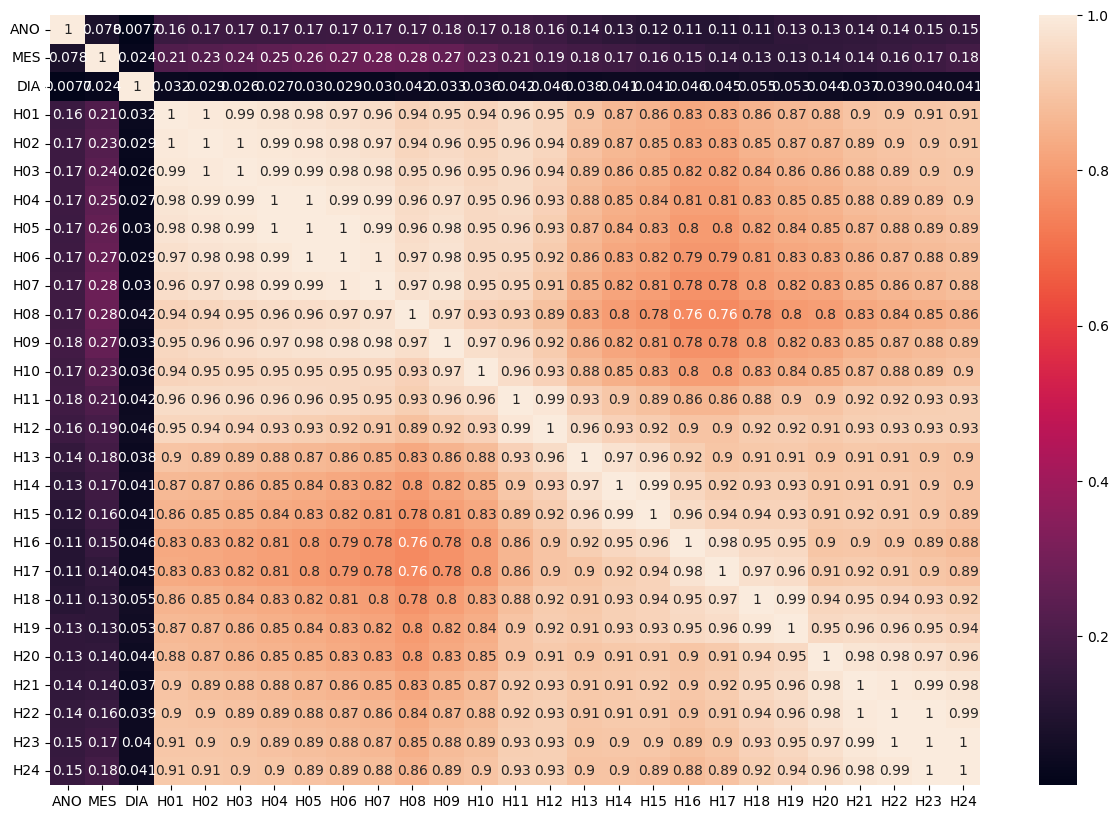

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(df_temperatura_plz_esp.corr(),annot=True);
